# Confusion Matrix

In Machine Learning, you frame the problem, collect and clean the data, add some necessary feature variables(if any), train the model, measure its performance, improve it by using some cost function, and then it is ready to deploy. 
**But how do we measure its performance? Is there any particular feature to look at?**

There are plenty of ways to gauge the performance of your classification model but none have stood the test of time like the confusion matrix. It helps us evaluate how our model performed, where it went wrong and offers us guidance to correct our path.

## What is a Confusion Matrix?

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

For a binary classification problem, we would have a 2 x 2 matrix as shown below with 4 values:
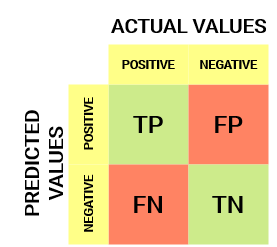
Let’s decipher the matrix:

* The target variable has two values: Positive or Negative
* The columns represent the actual values of the target variable
* The rows represent the predicted values of the target variable

**True Positive (TP)**

The predicted value matches the actual value
The actual value was positive and the model predicted a positive value

**True Negative (TN)**

The predicted value matches the actual value
The actual value was negative and the model predicted a negative value

**False Positive (FP) – Type 1 error**

The predicted value was falsely predicted
The actual value was negative but the model predicted a positive value
Also known as the Type 1 error

**False Negative (FN) – Type 2 error**

The predicted value was falsely predicted
The actual value was positive but the model predicted a negative value
Also known as the Type 2 error

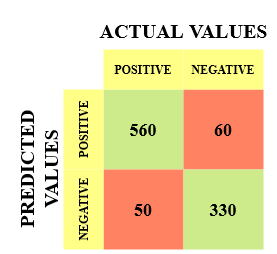
* True Positive (TP) = 560; meaning 560 positive class data points were correctly classified by the model
* True Negative (TN) = 330; meaning 330 negative class data points were correctly classified by the model
* False Positive (FP) = 60; meaning 60 negative class data points were incorrectly classified as belonging to the positive class by the model
* False Negative (FN) = 50; meaning 50 positive class data points were incorrectly classified as belonging to the negative class by the model

This turned out to be a pretty decent classifier for our dataset considering the relatively larger number of true positive and true negative values.

In [1]:
# import data and libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data=pd.read_csv("data.csv")
# What kind of tumor is that? 
# A tumor develops when cells reproduce too quickly.
# Tumors can vary in size from a tiny nodule to a large mass, depending on the type, 
# and they can appear almost anywhere on the body.
# There are two main types of tumor:
# Benign: These are not cancerous. They either cannot spread or grow, or they do so very slowly.           = B
# Malignant: Malignant tumors are cancerous. The cells can grow and spread to other parts of the body.     = M

# Clean the dataset
data.drop(["Unnamed: 32", "id"],axis=1,inplace=True) # axis : all column, inplace=save in data

# x=features y=label(class)
data.diagnosis = [0 if each == "B" else 1 for each in data.diagnosis ]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1) #the rest of them are my features 

# normalization
# High values of data may override other properties and disrupt this model.
# We will scale all features to 0 - 1 
x = (x_data - np.min(x_data)) / (np.max(x_data) -  np.min(x_data)).values

In [2]:
# Dataset train - test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=42) # divide randomly but I will run this code many time
# To keep accuracy, I set to 42, same random way it will divide

In [3]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100,random_state=1) # estimators = number of trees 
# random_state = number of samples, we define the number to not have  problem in our other predictions ( random = default )
rf.fit(x_train,y_train)
print("Random forest score(accuracy): ", rf.score(x_test,y_test))

Random forest score(accuracy):  0.9534883720930233


In [4]:
# CONFUSION MATRIX CONTROL
y_prediction = rf.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_prediction)

In [5]:
cm

array([[53,  1],
       [ 3, 29]], dtype=int64)

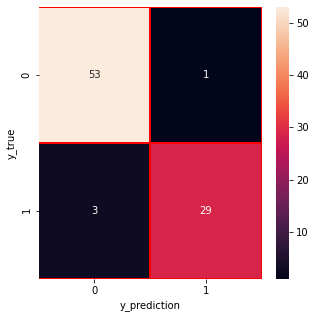

In [6]:
f, ax= plt.subplots(figsize=(5,5)) #figure size 5,5
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_true")
plt.show()